## Least Square Estimation of AR Models and Whitening
Consider an $p$-order autoregressive model driven by white noise.
$$ y_n = \sum_{k=1}^{p} a_ky_{n-k} + \epsilon_n $$
where, $\epsilon$ is a Gaussian white noise with zero mean and some variance $\sigma_{\epsilon}^2$.

Let us assume that we have $N$ sample of this AR process and we are interested in estimating the parameter $a_k$. We can arrange the data into a set of $N-p$ linear equations,
$$ \begin{bmatrix}
y_{0} & y_{1} & \cdots & y_{p-1} \\
y_{1} & y_{2} & \cdots & y_{p} \\
y_{2} & y_{3} & \cdots & y_{p+1} \\
% y_{p+1} & y_{p} & \cdots & y_{2} \\
\vdots & \vdots & \ddots & \vdots \\
y_{N-p-1} & y_{N-p} & \cdots & y_{N-2}
\end{bmatrix} \begin{bmatrix}
a_p \\
a_{p-1} \\
\vdots \\
a_1
\end{bmatrix} = \begin{bmatrix}
y_{p}\\
y_{p+1}\\
y_{p+2}\\
\vdots\\
y_{N-1}
\end{bmatrix} \longrightarrow \mathbf{Y}\mathbf{a} = \mathbf{y} $$

The least-squares solution to this problem is the following,
$$ \hat{\mathbf{a}} = \left(\mathbf{Y}^T\mathbf{Y}\right)^{-1}\mathbf{Y}^T\mathbf{y} $$

Post-multiplying $\mathbf{y}$ by the pseudo-inverse will provide the least square estimate of $\mathbf{a}$.

## Whitening using $\hat{a}$
Once $\hat{a}$ is obtained, then the signal $y_n$ can be whitened by passing it through the following moving average filter.
$$w_n = y_n - \sum_{k=1}^{p} \hat{a}_ky_{n-k}$$

$w_n$ would be the out of this moving average filter, and $w_n$ will be a white noise. The input to this moving average filter the measured time series $y_n$.

### Define a stationary AR process & generate a time-series sample 

In [15]:
# AR parameters
p = 4
a = 1.0 * np.random.rand(p) - 0.5
print "Original AR parameters:\n", a

# Time series data
N = 1000
n = np.arange(0, N)

# Input white noise
eparam = (0, 1.0)
e = np.sqrt(eparam[1]) * np.random.randn(N) + eparam[0]

# Generate AR time series.
y = genARProcess(p, a, eparam, e)

Original AR parameters:
[ 0.40386596  0.18026229  0.09790913 -0.32257933]


### Estimate AR parameters using the entire dataset

Original AR parameters:
[ 0.40386596  0.18026229  0.09790913 -0.32257933]
Estimated AR parameters:
[ 0.38832655  0.17719396  0.09158926 -0.31408969]


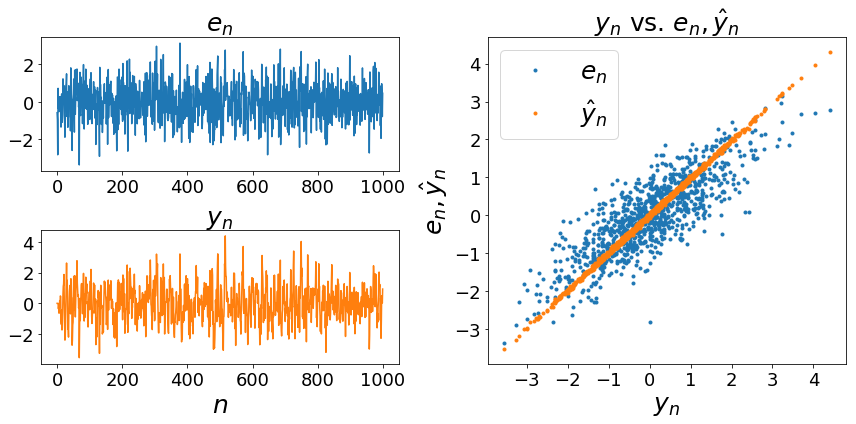

In [72]:
# Estimate autogressive model parameters
ahat = estARParam(p, y)
# Generate time series using estimated parameters
yhat = genARProcess(p, ahat, eparam, e)

plot_arfit(n, e, y, yhat)

print "Original AR parameters:\n", a
print "Estimated AR parameters:\n", ahat

### Whiten the AR process output using the  $\hat{a}$

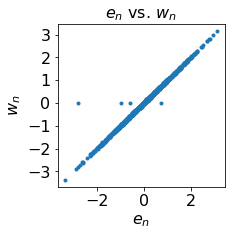

In [36]:
w = whiten(y, ahat)

figure(figsize=(3, 3))
plot(e, w, '.')
xlabel("$e_n$", fontsize=16)
ylabel("$w_n$", fontsize=16)
title("$e_n$ vs. $w_n$", fontsize=16)
xticks(fontsize=16)
yticks(fontsize=16);

### Non-stationary AR process with input with varying variance 
Even if the input signal was white but non-stationary, the input could be recovered through the AR estimation process, as demonstrated in the following example.

In [74]:
# Input white noise
N = 1000
n = np.arange(0, N)
# v acts as a window that changes the variance of e
v = 1 + (n >= 300) * (n < 700)
e = v * np.sqrt(eparam[1]) * np.random.randn(N) + eparam[0]

# Generate AR time series.
y = genARProcess(p, a, eparam, e)

Original AR parameters:
[ 0.40386596  0.18026229  0.09790913 -0.32257933]
Estimated AR parameters:
[ 0.4121732   0.24090725  0.06213684 -0.36027087]


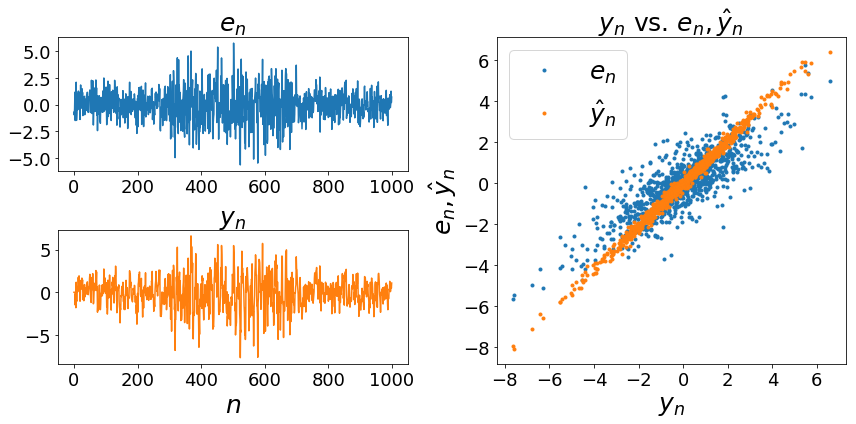

In [75]:
ahat = estARParam(p, y)
yhat = genARProcess(p, ahat, eparam, e)

plot_arfit(n, e, y, yhat)

print "Original AR parameters:\n", a
print "Estimated AR parameters:\n", ahat

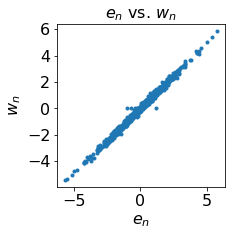

In [79]:
w = whiten(y, ahat)

figure(figsize=(3, 3))
plot(e, w, '.')
xlabel("$e_n$", fontsize=16)
ylabel("$w_n$", fontsize=16)
title("$e_n$ vs. $w_n$", fontsize=16)
xticks(fontsize=16)
yticks(fontsize=16);

## Non-stational Autoregressive Model with Varying Model Parameters
Consider the following time-varying $p$-order autoregressive model driven by white noise.
$$ y_n = \sum_{k=1}^{p} a_{n, k}y_{n-k} + \epsilon_n $$
where, $\epsilon$ is a Gaussian white noise with zero mean and some variance $\sigma_{\epsilon}^2$.

Assuming that the parameter variations occur at a larger timescale than the sampling interval, we can estimate these time-varying parameters by carrying out the estimation procedure on a running window of data.

At given point in time $n$, we use the data from the last $M$ samples, $\{y_k\}_{k=n-M+1}^n$. These $M$ data points are used to estimate the AR parameters through the same procedure that was described earlier,
$$ \begin{bmatrix}
y_{n-M+1-p} & y_{n-M+2-p} & \cdots & y_{n-M} \\
% y_{n-M} & y_{n-M-1} & \cdots & y_{n-M+1-p} \\
y_{n-M+2-p} & y_{n-M+3-p} & \cdots & y_{n-M+1} \\
% y_{n-M+1} & y_{n-M} & \cdots & y_{n-M+2-p} \\
y_{n-M+3-p} & y_{n-M+4-p} & \cdots & y_{n-M+2} \\
% y_{n-M+2} & y_{n-M+1} & \cdots & y_{n-M+3-p} \\
\vdots & \vdots & \ddots & \vdots \\
y_{n-p} & y_{n-p+1} & \cdots & y_{n-1}
\end{bmatrix} \begin{bmatrix}
a_{n,p} \\
a_{n,p-1} \\
\vdots \\
a_{n,1}
\end{bmatrix} = \begin{bmatrix}
y_{n-M+1}\\
y_{n-M+2}\\
y_{n-M+3}\\
\vdots\\
y_{n}
\end{bmatrix}$$

$$
\mathbf{Y}_{n}\mathbf{a}_n = \mathbf{y}_{n,M}
$$
where, $\mathbf{y}_{n,M}$ is a column vector consisting of the past $M$ data points, $y_n$ as the last element of the $\mathbf{y}_{n,M}$.

$$ \hat{\mathbf{a}}_{n} = \left(\mathbf{Y}_n^T\mathbf{Y}_n\right)^{-1}\mathbf{Y}_n^T\mathbf{y}_{n, M} $$

## Whitening using $\hat{a}_n$
Once $\hat{a}_n$ is obtained, then the signal $y_n$ can be whitened by passing it through the following moving average filter.
$$w_n = y_n - \sum_{k=1}^{p} \hat{a}_{n, k}y_{n-k}$$

$w_n$ would be the out of this moving average filter, and $w_n$ will be a white noise. The input to this moving average filter the measured time series $y_n$.

## Recursive estimation of AR parameters.
Instead of having to solve a new least squares problem at each time instant, whih can be computaionally intensive, we could estimate $\hat{\mathbf{a}}_n$ using $\hat{\mathbf{a}}_{n-1}$ and the new data point $y_n$.

The matrix $\mathbf{Y}_n$ can be written in terms as the following,
$$ \mathbf{Y}_n = \begin{bmatrix}
\mathbf{y}_{n-M, p}^T \\
\mathbf{y}_{n-M+1, p}^T \\
\vdots \\
\mathbf{y}_{n-1, p}^T
\end{bmatrix} \implies \mathbf{Y}_n^T = \begin{bmatrix}
\mathbf{y}_{n-M, p} & \mathbf{y}_{n-M+1, p} &  
\ldots & \mathbf{y}_{n-1, p}
\end{bmatrix} $$

$$ \mathbf{Y}_n^T\mathbf{Y}_n = \sum_{i=1}^{M} \mathbf{y}_{n-i, p}\mathbf{y}_{n-i, p}^T$$

We can write a recursive expression for $\mathbf{Y}_n^T\mathbf{Y}_n$ as the following,

$$ \mathbf{Y}_n^T\mathbf{Y}_n = \mathbf{Y}_{n-1}^T\mathbf{Y}_{n-1} + \mathbf{y}_{n-1, p}\mathbf{y}_{n-1, p}^T - \mathbf{y}_{n-M-1, p}\mathbf{y}_{n-M-1, p}^T $$

Now, the right hand side can be written as the following,

$$ \mathbf{Y}_{n}^T\mathbf{y}_{n} = \begin{bmatrix} 
\mathbf{y}_{n-M, p} & \mathbf{y}_{n-M+1, p} &  
\ldots & \mathbf{y}_{n-1, p}
\end{bmatrix} \begin{bmatrix}
y_{n-M+1}\\
y_{n-M+2}\\
y_{n-M+3}\\
\vdots\\
y_{n}
\end{bmatrix} = \sum_{i=1}^{M} y_{n-i+1}\mathbf{y}_{n-i, p}$$

Since, $ \mathbf{Y}_{n-1}^T\mathbf{y}_{n-1} = \sum_{i=1}^{M} y_{n-i}\mathbf{y}_{n-i-1, p}$, we have

$$ \mathbf{Y}_{n}^T\mathbf{y}_{n} = \mathbf{Y}_{n-1}^T\mathbf{y}_{n-1} + y_{n}\mathbf{y}_{n-M+1} - y_{n-M}\mathbf{y}_{n-M-1, p}$$

We can avoid calculating $\mathbf{Y}_n^T\mathbf{Y}_n$ and $\mathbf{Y}_n^T\mathbf{y}_{n, M}$ from scratch by using the recursive relationships. Once we calculate these, we can estimate the AR parameters at time  $n$,

$$ \hat{\mathbf{a}}_{n} = \left(\mathbf{Y}_n^T\mathbf{Y}_n\right)^{-1}\mathbf{Y}_n^T\mathbf{y}_{n, M} $$

In [1]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Stationary AR process implementation
def genARProcess(p, a, eparam, e):
    N = len(e)
    me, ve = eparam
    # Generate the filtered signal
    y = np.zeros(N)
    for i in xrange(p, N):
        y[i] = e[i]
        for k in xrange(p):
            y[i] += a[k] * y[i - k - 1]
    return y


# Estimation of AR parameters for a stationary process,
# using the entire data set.
def estARParam(p, y):
    N = len(y)
    ymat = np.zeros((N - p, p))
    yb = np.zeros((N - p - 1, 1))
    for c in xrange(p, 0, -1):
        ymat[:, p-c] = y[p-c:-c]
    yb = y[p:]
    return np.matmul(np.linalg.pinv(ymat), yb)[::-1]


# Implementation of stationary whitening filter.
def whiten(y, ahat):
    N = len(y)
    p = len(ahat)
    w = np.zeros(N)
    for i in xrange(N):
        w[i] = y[i]
        for k in xrange(p):
            if i - k - 1 >= 0:
                w[i] += - ahat[k] * y[i - k - 1]
    return w

In [3]:
def plot_arfit(n, e, y, yhat):
    figure(figsize=(12, 6))
    subplot(221)
    plot(n, e, label="$e_n$")
    title("$e_n$", fontsize=25)
    xticks(fontsize=18)
    yticks(fontsize=18)

    subplot(223)
    plot(0,0)
    plot(n, y, label="$y_n$")
    xlabel("$n$", fontsize=25)
    title("$y_n$", fontsize=25)
    xticks(fontsize=18)
    yticks(fontsize=18)

    subplot(122)
    plot(y, e, '.', label="$e_n$")
    plot(y, yhat, '.', label="$\hat{y}_n$")
    legend(loc=2, fontsize=25)
    xlabel("$y_n$", fontsize=25)
    ylabel("$e_n, \hat{y}_n$", fontsize=25)
    title("$y_n$ vs. $e_n, \hat{y}_n$", fontsize=25)
    xticks(fontsize=18)
    yticks(fontsize=18)
    tight_layout();

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()